<a href="https://colab.research.google.com/github/jumbokh/Computer-Vision/blob/main/notebooks/TF_CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from tensorflow import keras
import tensorflow.keras.utils as np_utils


In [ ]:
keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
(x_Train, y_Train), (x_Test, y_Test) = keras.datasets.mnist.load_data()

In [ ]:
print('x_train_image:',x_Train.shape)
print('y_train_label:',y_Train.shape)

x_train_image: (60000, 28, 28)
y_train_label: (60000,)


In [ ]:
print('x_test_image:',x_Test.shape)
print('y_test_label:',y_Test.shape)

x_test_image: (10000, 28, 28)
y_test_label: (10000,)


In [ ]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary')
    plt.show()

In [ ]:
x_Train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

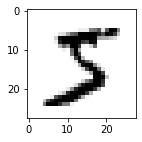

In [ ]:
plot_image(x_Train[0])

In [ ]:
y_Train[0]

5

In [ ]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,
                                  prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx])

        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

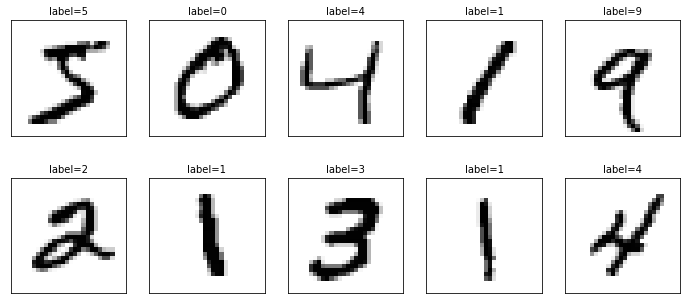

In [ ]:
plot_images_labels_prediction(x_Train,y_Train,[],0,10)

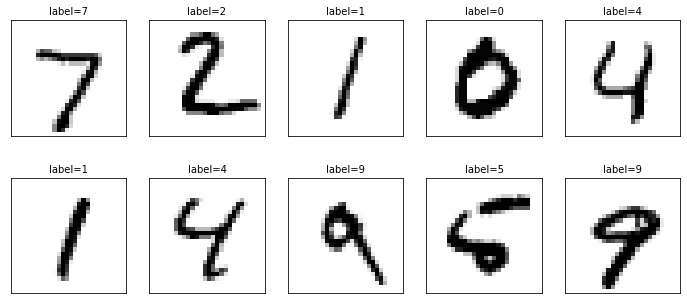

In [ ]:
plot_images_labels_prediction(x_Test,y_Test,[],0,10)

In [ ]:
x_Train.shape

(60000, 28, 28)

In [ ]:
# 多加一個顏色的維度
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [ ]:
x_Train4D.shape

(60000, 28, 28, 1)

In [ ]:
# 將數值縮小到0~1
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [ ]:
# 把類別做Onehot encoding
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

In [ ]:
y_Train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
y_TrainOneHot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

# 建立CNN模型

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [ ]:
model = Sequential()

In [ ]:
#filter為16, Kernel size為(5,5),Padding為(same)
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1),
                 activation='relu'))

In [ ]:
# MaxPooling size為(2,2)
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))

In [ ]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
# Drop掉部分神經元避免overfitting
model.add(Dropout(0.25))

In [ ]:
# 平坦化
model.add(Flatten())

In [ ]:
model.add(Dense(128, activation='relu'))

In [ ]:
model.add(Dropout(0.5))

In [ ]:
model.add(Dense(10,activation='softmax'))

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 36)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1764)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

## 訓練模型

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
train_history=model.fit(x=x_Train4D_normalize,
                        y=y_TrainOneHot,validation_split=0.2,
                        epochs=20, batch_size=300,verbose=2)

Epoch 1/20
160/160 - 33s - loss: 0.4632 - accuracy: 0.8558 - val_loss: 0.0998 - val_accuracy: 0.9688
Epoch 2/20
160/160 - 2s - loss: 0.1317 - accuracy: 0.9608 - val_loss: 0.0653 - val_accuracy: 0.9812
Epoch 3/20
160/160 - 2s - loss: 0.0970 - accuracy: 0.9709 - val_loss: 0.0534 - val_accuracy: 0.9837
Epoch 4/20
160/160 - 2s - loss: 0.0806 - accuracy: 0.9752 - val_loss: 0.0517 - val_accuracy: 0.9847
Epoch 5/20
160/160 - 3s - loss: 0.0693 - accuracy: 0.9794 - val_loss: 0.0424 - val_accuracy: 0.9877
Epoch 6/20
160/160 - 2s - loss: 0.0592 - accuracy: 0.9815 - val_loss: 0.0413 - val_accuracy: 0.9887
Epoch 7/20
160/160 - 2s - loss: 0.0555 - accuracy: 0.9836 - val_loss: 0.0368 - val_accuracy: 0.9894
Epoch 8/20
160/160 - 3s - loss: 0.0490 - accuracy: 0.9853 - val_loss: 0.0341 - val_accuracy: 0.9893
Epoch 9/20
160/160 - 2s - loss: 0.0458 - accuracy: 0.9863 - val_loss: 0.0325 - val_accuracy: 0.9910
Epoch 10/20
160/160 - 3s - loss: 0.0404 - accuracy: 0.9873 - val_loss: 0.0333 - val_accuracy: 0.990

In [ ]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

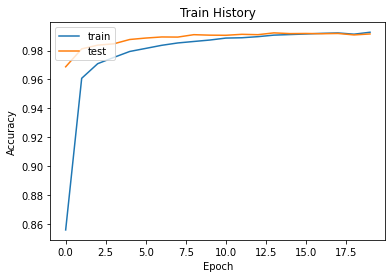

In [ ]:
show_train_history('accuracy','val_accuracy')

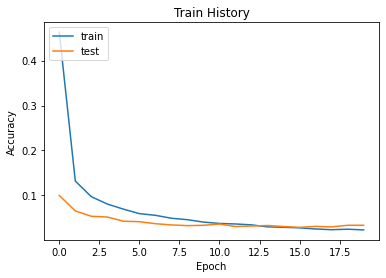

In [ ]:
show_train_history('loss','val_loss')

# 評估模型準確率

In [ ]:
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]

313/313 [==============================] - 2s 5ms/step - loss: 0.0211 - accuracy: 0.9925


0.9925000071525574

# 預測結果

In [ ]:
prediction=model.predict(x_Test4D_normalize)

In [ ]:
prediction[:10]

array([[2.84851861e-14, 4.78939596e-11, 9.38510866e-11, 4.45743389e-08,
        6.49469682e-13, 1.20927270e-12, 8.97628525e-18, 9.99999881e-01,
        1.77373101e-12, 1.31986170e-07],
       [2.85510116e-10, 1.41445966e-09, 1.00000000e+00, 3.53185363e-13,
        6.55703530e-12, 5.01961254e-17, 3.74558873e-09, 2.89457043e-13,
        3.32716285e-11, 5.08549739e-14],
       [4.52184012e-10, 9.99999642e-01, 3.21498328e-10, 2.55778471e-12,
        2.80200112e-08, 7.98562216e-10, 6.99549290e-08, 2.38788488e-07,
        3.23400293e-08, 1.60183478e-10],
       [9.99998689e-01, 3.84106245e-12, 4.50894322e-10, 1.14323155e-10,
        6.48602656e-12, 3.37110571e-08, 1.26652390e-06, 2.24104824e-09,
        8.30540881e-09, 2.11887521e-08],
       [6.15897416e-13, 2.37233122e-10, 1.09627186e-11, 5.40908464e-15,
        1.00000000e+00, 2.37342752e-13, 7.15399268e-11, 9.31060892e-13,
        6.90264631e-13, 3.41533983e-08],
       [6.74395598e-13, 1.00000000e+00, 9.04978241e-13, 4.71277644e-16,
   

# 查看預測結果

In [ ]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')

        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10)

        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
        if idx >= len(images):
            break
    plt.show()

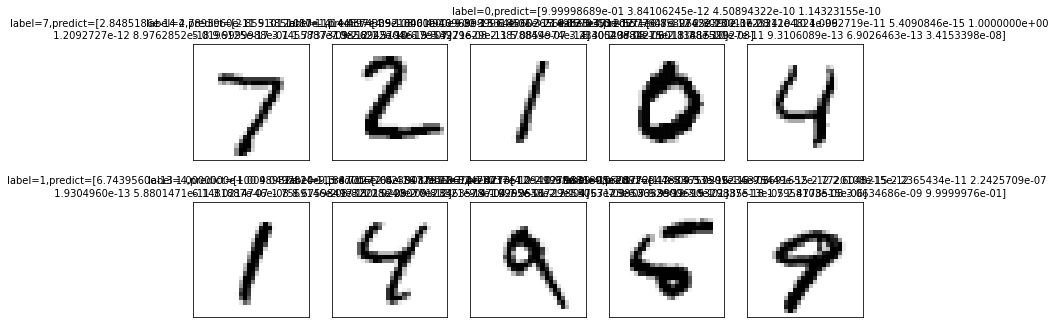

In [ ]:
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)